In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
train=pd.read_csv('traintitanic.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

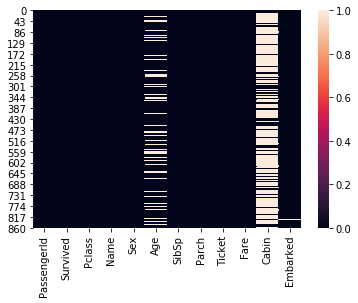

In [9]:
sns.heatmap(train.isnull())

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Exploratory Data Analysis

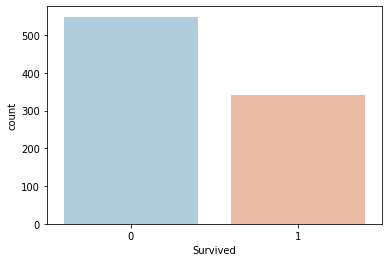

In [12]:
sns.countplot(train.Survived,palette='RdBu_r')

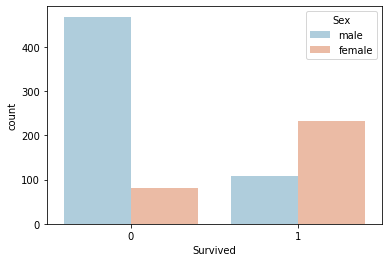

In [13]:
sns.countplot(train.Survived,hue='Sex',data=train,palette='RdBu_r')

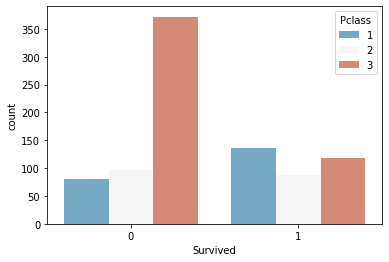

In [14]:
sns.countplot(train.Survived,hue='Pclass',data=train,palette='RdBu_r')

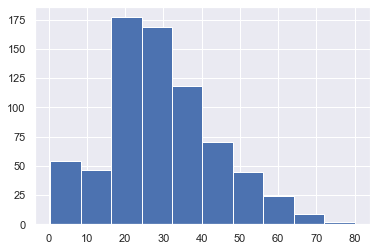

In [15]:
sns.set()
train.Age.hist()

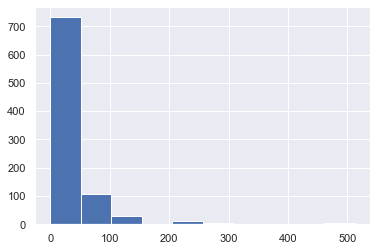

In [16]:
sns.set()
train.Fare.hist()

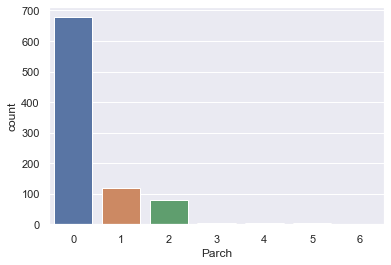

In [17]:
sns.countplot(train.Parch)

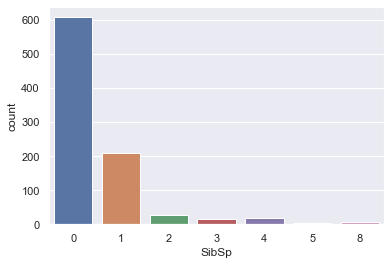

In [18]:
sns.countplot(train.SibSp)

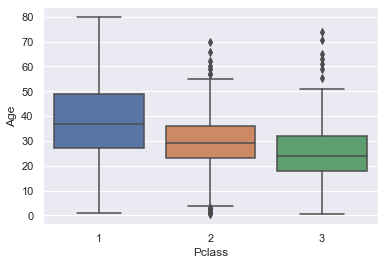

In [19]:
sns.boxplot(train.Pclass,train.Age)

In [20]:
# Data Preprocessiing

In [21]:
def impute_ages(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

            

In [22]:
train.Age=train[['Age','Pclass']].apply(impute_ages,axis=1)

In [23]:
train.Embarked=train.Embarked.fillna('S')

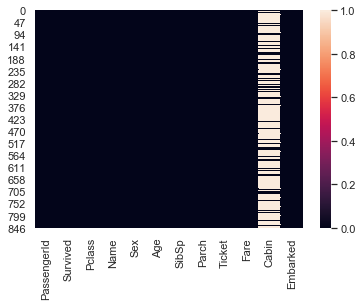

In [24]:
sns.heatmap(train.isnull())

In [25]:
train=train.drop('Cabin',axis=1)

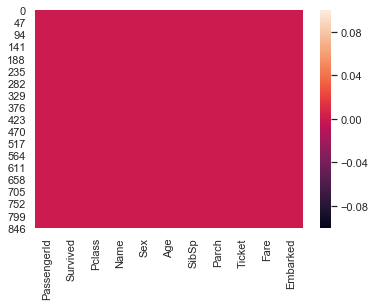

In [26]:
sns.heatmap(train.isnull())

In [27]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.05,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.25,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.55,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,C
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.65,S


In [28]:
train=train.drop(['PassengerId','Name','Ticket',],axis=1)

In [29]:
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
297,0,1,female,2.0,1,2,151.5500,S
138,0,3,male,16.0,0,0,9.2167,S
639,0,3,male,24.0,1,0,16.1000,S
876,0,3,male,20.0,0,0,9.8458,S
881,0,3,male,33.0,0,0,7.8958,S


In [30]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [31]:
le=LabelEncoder()
cate_cols=['Sex','Embarked']
for x in cate_cols:
    train[x]=le.fit_transform(train[x])

In [32]:
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
621,1,1,1,42.0,1,0,52.5542,2
816,0,3,0,23.0,0,0,7.9250,2
707,1,1,1,42.0,0,0,26.2875,2
282,0,3,1,16.0,0,0,9.5000,2
393,1,1,0,23.0,1,0,113.2750,0


In [33]:
y=train.Survived
x=train.drop('Survived',axis=1)

In [34]:
x.shape,y.shape

((891, 7), (891,))

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [36]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
per=Perceptron()
per.fit(x_train,y_train)
prediction=per.predict(x_test)

In [38]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       103
           1       0.84      0.68      0.75        76

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [39]:
print('Accuracy_score: ',accuracy_score(y_test,prediction))

Accuracy_score:  0.8100558659217877


In [40]:
cm=confusion_matrix(y_test,prediction)
cm

array([[93, 10],
       [24, 52]], dtype=int64)

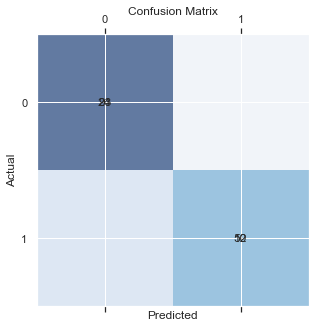

In [41]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.60)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=j,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


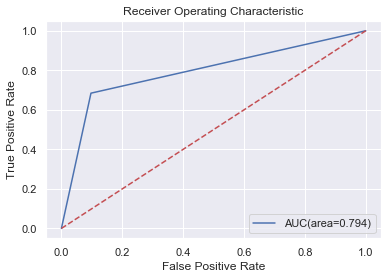

In [44]:
auc=roc_auc_score(y_test,prediction)
fpr,tpr,thr=roc_curve(y_test,prediction)
plt.plot(fpr,tpr,label='AUC(area=%0.3f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()